In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Extracting and transforming data

### como ler o csv já definindo quem será a coluna index?


In [2]:
election = pd.read_csv('pennsylvania2012_turnout.csv', index_col = 'county')

### Slicing rows

In [3]:
election.head()

,state,total,Obama,Romney,winner,voters,turnout,margin
county,,,,,,,,
Adams,PA,41973,35.482334,63.112001,Romney,61156,68.632677,27.629667
Allegheny,PA,614671,56.640219,42.185820,Obama,924351,66.497575,14.454399
Armstrong,PA,28322,30.696985,67.901278,Romney,42147,67.198140,37.204293
Beaver,PA,80015,46.032619,52.637630,Romney,115157,69.483401,6.605012
Bedford,PA,21444,22.057452,76.986570,Romney,32189,66.619031,54.929118


In [4]:
teste = election.loc['Bedford','winner']
print(teste)

Romney


In [5]:
# Fatie os condados (são linhas) de Perry até Potter, CONDADOS SÃO INDEX
#faz logo aqui, depois confere la embaixo, o nome dado ao resultado será 
#p_counties =
p_counties= election.loc['perry':'potter', :]
# Slice the row labels 'Perry' to 'Potter': p_counties

# Parte as linhas de Perry até Potter: p_counties ( como é linha, a cláusula é antes da vírgula, lembre da ordem linha, coluna
# e as palavras do filtro separadas por :)
# veja na linha acima que o indice é a coluna county, logo ela será nossa coluna a filtrar
p_counties = election.loc['Perry':'Potter', :]

# Print the p_counties DataFrame
print(p_counties)

#agora faz a mesma coisa só que em ordem reversa, de potter até perry
condados_reverso = election.loc['Potter':'Perry':-1, :]
# Slice the row labels 'Potter' to 'Perry' in reverse order: p_counties_rev
p_counties_rev = election.loc['Potter':'Perry':-1, :]

# Print the p_counties_rev DataFrame
print(p_counties_rev)
print(condados_reverso)

             state   total      Obama     Romney  winner   voters    turnout  \
county                                                                         
Perry           PA   18240  29.769737  68.591009  Romney    27245  66.948064   
Philadelphia    PA  653598  85.224251  14.051451   Obama  1099197  59.461407   
Pike            PA   23164  43.904334  54.882576  Romney    41840  55.363289   
Potter          PA    7205  26.259542  72.158223  Romney    10913  66.022175   

                 margin  
county                   
Perry         38.821272  
Philadelphia  71.172800  
Pike          10.978242  
Potter        45.898681  
             state   total      Obama     Romney  winner   voters    turnout  \
county                                                                         
Potter          PA    7205  26.259542  72.158223  Romney    10913  66.022175   
Pike            PA   23164  43.904334  54.882576  Romney    41840  55.363289   
Philadelphia    PA  653598  85.224251  14.0

In [6]:
print(p_counties_rev)


             state   total      Obama     Romney  winner   voters    turnout  \
county                                                                         
Potter          PA    7205  26.259542  72.158223  Romney    10913  66.022175   
Pike            PA   23164  43.904334  54.882576  Romney    41840  55.363289   
Philadelphia    PA  653598  85.224251  14.051451   Obama  1099197  59.461407   
Perry           PA   18240  29.769737  68.591009  Romney    27245  66.948064   

                 margin  
county                   
Potter        45.898681  
Pike          10.978242  
Philadelphia  71.172800  
Perry         38.821272  


### Slicing columns

In [7]:
#fatia as colunas da esquerda pra direita do inicio ate obama

esquerda = election.loc[:,:'Obama']
# # Slice the columns from the starting column to 'Obama': left_columns
left_columns = election.loc[:, :'Obama']

# Print the output of left_columns.head()
print(left_columns.head())

# Slice the columns from 'Obama' to 'winner': middle_columns
middle_columns = election.loc[:, 'Obama':'winner']

# Print the output of middle_columns.head()
print(middle_columns.head())

# Slice the columns from 'Romney' to the end: 'right_columns'
right_columns = election.loc[:, 'Romney':]

# Print the output of right_columns.head()
print(right_columns.head())

          state   total      Obama
county                            
Adams        PA   41973  35.482334
Allegheny    PA  614671  56.640219
Armstrong    PA   28322  30.696985
Beaver       PA   80015  46.032619
Bedford      PA   21444  22.057452
               Obama     Romney  winner
county                                 
Adams      35.482334  63.112001  Romney
Allegheny  56.640219  42.185820   Obama
Armstrong  30.696985  67.901278  Romney
Beaver     46.032619  52.637630  Romney
Bedford    22.057452  76.986570  Romney
              Romney  winner  voters    turnout     margin
county                                                    
Adams      63.112001  Romney   61156  68.632677  27.629667
Allegheny  42.185820   Obama  924351  66.497575  14.454399
Armstrong  67.901278  Romney   42147  67.198140  37.204293
Beaver     52.637630  Romney  115157  69.483401   6.605012
Bedford    76.986570  Romney   32189  66.619031  54.929118


### Subselecting DataFrames with lists

In [8]:
#three_counties.head()

In [9]:
# Create the list of row labels: rows
rows = ['Philadelphia', 'Centre', 'Fulton']

# Create the list of column labels: cols
cols = ['winner', 'Obama', 'Romney']

# Create the new DataFrame: three_counties
three_counties = election.loc[rows, cols]

# Print the three_counties DataFrame
print(three_counties)

              winner      Obama     Romney
county                                    
Philadelphia   Obama  85.224251  14.051451
Centre        Romney  48.948416  48.977486
Fulton        Romney  21.096291  77.748861


### Thresholding data (dados no limiar)

In [10]:
# cria um array com uma faixa de valores baseado em um campo do dataset
# filtra o dataframe baseado neste array e joga em um novo dataframe chamado high_turnout_df
# imprime o novo dataframe

In [11]:
# Create the boolean array: high_turnout
high_turnout = election.turnout > 70
high_turnout = election['turnout'] > 70

# Filter the election DataFrame with the high_turnout array: high_turnout_df
high_turnout_df = election[high_turnout]

# Print the high_turnout_results DataFrame
print(high_turnout_df)

             state   total      Obama     Romney  winner  voters    turnout  \
county                                                                        
Bucks           PA  319407  49.966970  48.801686   Obama  435606  73.324748   
Butler          PA   88924  31.920516  66.816607  Romney  122762  72.436096   
Chester         PA  248295  49.228539  49.650617  Romney  337822  73.498766   
Forest          PA    2308  38.734835  59.835355  Romney    3232  71.410891   
Franklin        PA   62802  30.110506  68.583803  Romney   87406  71.850903   
Montgomery      PA  401787  56.637223  42.286834   Obama  551105  72.905708   
Westmoreland    PA  168709  37.567646  61.306154  Romney  238006  70.884347   

                 margin  
county                   
Bucks          1.165284  
Butler        34.896091  
Chester        0.422079  
Forest        21.100520  
Franklin      38.473297  
Montgomery    14.350390  
Westmoreland  23.738508  


In [12]:
high_turnout_df.head()

,state,total,Obama,Romney,winner,voters,turnout,margin
county,,,,,,,,
Bucks,PA,319407,49.966970,48.801686,Obama,435606,73.324748,1.165284
Butler,PA,88924,31.920516,66.816607,Romney,122762,72.436096,34.896091
Chester,PA,248295,49.228539,49.650617,Romney,337822,73.498766,0.422079
Forest,PA,2308,38.734835,59.835355,Romney,3232,71.410891,21.100520
Franklin,PA,62802,30.110506,68.583803,Romney,87406,71.850903,38.473297


### Filtering columns using other columns

In [13]:
election.head()

,state,total,Obama,Romney,winner,voters,turnout,margin
county,,,,,,,,
Adams,PA,41973,35.482334,63.112001,Romney,61156,68.632677,27.629667
Allegheny,PA,614671,56.640219,42.185820,Obama,924351,66.497575,14.454399
Armstrong,PA,28322,30.696985,67.901278,Romney,42147,67.198140,37.204293
Beaver,PA,80015,46.032619,52.637630,Romney,115157,69.483401,6.605012
Bedford,PA,21444,22.057452,76.986570,Romney,32189,66.619031,54.929118


In [14]:
# Import numpy
import numpy as np

# Create the boolean array: too_close
too_close = election.margin < 1

In [15]:
#print(too_close.head(10))
#print(election.head(10))

In [16]:
# Import numpy
import numpy as np

# Create the boolean array: too_close
too_close = election.margin < 1

# Assign np.nan to the 'winner' column where the results were too close to call
# Atribua np.nan à coluna 'winner', onde os resultados foram muito próximos para serem chamados
election.loc[too_close, 'winner'] = np.nan

# Print the output of election.info()
print(election.info())
 #veja que abaixo de romney tem a coluna winner

<class 'pandas.core.frame.DataFrame'>
Index: 67 entries, Adams to York
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   state    67 non-null     object 
 1   total    67 non-null     int64  
 2   Obama    67 non-null     float64
 3   Romney   67 non-null     float64
 4   winner   64 non-null     object 
 5   voters   67 non-null     int64  
 6   turnout  67 non-null     float64
 7   margin   67 non-null     float64
dtypes: float64(4), int64(2), object(2)
memory usage: 6.8+ KB
None


In [17]:
election.head(10)

,state,total,Obama,Romney,winner,voters,turnout,margin
county,,,,,,,,
Adams,PA,41973,35.482334,63.112001,Romney,61156,68.632677,27.629667
Allegheny,PA,614671,56.640219,42.185820,Obama,924351,66.497575,14.454399
Armstrong,PA,28322,30.696985,67.901278,Romney,42147,67.198140,37.204293
Beaver,PA,80015,46.032619,52.637630,Romney,115157,69.483401,6.605012
Bedford,PA,21444,22.057452,76.986570,Romney,32189,66.619031,54.929118
Berks,PA,163253,48.939376,49.528646,NaN,250356,65.208343,0.589269
Blair,PA,47631,32.575424,66.133401,Romney,85328,55.821067,33.557977
Bradford,PA,22501,36.847251,61.450602,Romney,40490,55.571746,24.603351
Bucks,PA,319407,49.966970,48.801686,Obama,435606,73.324748,1.165284


### Filtering using NaNs ( removendo NaN e removendo aqueles que tem menos que 1000 preenchidos)


In [19]:
titanic = pd.read_csv('titanic.csv')

# Select the 'age' and 'cabin' columns: df
df = titanic[['age','cabin']]

# Print the shape of df
print(df.shape)
print (titanic.shape)
#df.head(3)

(1309, 2)
(1309, 14)


In [24]:
# Drop columns in titanic with less than 1000 non-missing values
# dropa colunas com menos de 1000 valores não ausentes (menos de 1000 preenchidos -> dropa; mais de 1000 -> mantém)
# ou seja, menos de 1000 preenchidos é que está muita coisa vazia, vamos dropar pois são dados esparsos
print(titanic.dropna(thresh=1000, axis='columns').info())
titanic.dropna(thresh=1000, axis='columns').isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 102.4+ KB
None


pclass        0
survived      0
name          0
sex           0
age         263
sibsp         0
parch         0
ticket        0
fare          1
embarked      2
dtype: int64

In [25]:
# Drop rows in df with how='any' and print the shape
print(df.dropna(how = 'any').shape)

# Drop rows in df with how='all' and print the shape
print(df.dropna(how = 'all').shape)

(272, 2)
(1069, 2)


### Using apply() to transform a column (apply pega o dataframe e aplica uma função def direto a uma coluna)


In [18]:
weather = pd.read_csv('pittsburgh2013.csv')

In [19]:
# Write a function to convert degrees Fahrenheit to degrees Celsius: to_celsius
def to_celsius(F):
    return 5/9*(F - 32)

# Apply the function over 'Mean TemperatureF' and 'Mean Dew PointF': df_celsius
df_celsius = weather[['Mean TemperatureF','Mean Dew PointF']].apply(to_celsius)

# Reassign the columns df_celsius
df_celsius.columns = ['Mean TemperatureC', 'Mean Dew PointC']

# Print the output of df_celsius.head()
print(df_celsius.head())

   Mean TemperatureC  Mean Dew PointC
0          -2.222222        -2.777778
1          -6.111111       -11.111111
2          -4.444444        -9.444444
3          -2.222222        -7.222222
4          -1.111111        -6.666667


### Using .map() with a dictionary (map() pega um dicionário e usa como critério para criar nova coluna com um if baseado no dicionário: se obama preenche com a palavra blue, se Romney preenche com a palavra red)


In [20]:
# Create the dictionary: red_vs_blue
red_vs_blue = {'Obama':'blue', 'Romney':'red'}

# Use the dictionary to map the 'winner' column to the new column: election['color']
election['color'] = election['winner'].map(red_vs_blue)

# Print the output of election.head()
print(election.head())

          state   total      Obama     Romney  winner  voters    turnout  \
county                                                                     
Adams        PA   41973  35.482334  63.112001  Romney   61156  68.632677   
Allegheny    PA  614671  56.640219  42.185820   Obama  924351  66.497575   
Armstrong    PA   28322  30.696985  67.901278  Romney   42147  67.198140   
Beaver       PA   80015  46.032619  52.637630  Romney  115157  69.483401   
Bedford      PA   21444  22.057452  76.986570  Romney   32189  66.619031   

              margin color  
county                      
Adams      27.629667   red  
Allegheny  14.454399  blue  
Armstrong  37.204293   red  
Beaver      6.605012   red  
Bedford    54.929118   red  


### Using vectorized functions - 

In [28]:
# Import zscore from scipy.stats
from scipy.stats import zscore

# Call zscore with election['turnout'] as input: turnout_zscore
turnout_zscore = zscore(election['turnout'])

# Print the type of turnout_zscore
print(type(turnout_zscore))

# Assign turnout_zscore to a new column: election['turnout_zscore']
election['turnout_zscore'] = turnout_zscore

# Print the output of election.head()
print(election.head())

<class 'pandas.core.series.Series'>
          state   total      Obama     Romney  winner  voters    turnout  \
county                                                                     
Adams        PA   41973  35.482334  63.112001  Romney   61156  68.632677   
Allegheny    PA  614671  56.640219  42.185820   Obama  924351  66.497575   
Armstrong    PA   28322  30.696985  67.901278  Romney   42147  67.198140   
Beaver       PA   80015  46.032619  52.637630  Romney  115157  69.483401   
Bedford      PA   21444  22.057452  76.986570  Romney   32189  66.619031   

              margin color  turnout_zscore  
county                                      
Adams      27.629667   red        0.853734  
Allegheny  14.454399  blue        0.439846  
Armstrong  37.204293   red        0.575650  
Beaver      6.605012   red        1.018647  
Bedford    54.929118   red        0.463391  


#### Select columns with all nonzeros
df2.loc[: , df2.all( )]
#### Select columns with any nonzeros
df2.loc[: , df2.any( )]
#### Select columns without NaNs
df.loc[: , df.notnull( ).all( )]
#### Select columns with any NaNs
df.loc[: , df.isnull( ).any( )]
#### Drop rows with any NaNs
df.dropna(how='any')

#### Work with string values
df.index.str.upper( )

df.index.map(str.lower)

## 2. Advanced indexing

In [20]:
sales = pd.read_csv('sales.csv', index_col = 'month')
sales

,eggs,salt,spam
month,,,
Jan,47,12.0,17
Feb,110,50.0,31
Mar,221,89.0,72
Apr,77,87.0,20
May,132,NaN,52
Jun,205,60.0,55


### Changing index of a DataFrame

In [21]:
# Create the list of new indexes: new_idx
new_idx = [idx.upper() for idx in sales.index]

# Assign new_idx to sales.index
sales.index = new_idx

# Print the sales DataFrame
print(sales)

     eggs  salt  spam
JAN    47  12.0    17
FEB   110  50.0    31
MAR   221  89.0    72
APR    77  87.0    20
MAY   132   NaN    52
JUN   205  60.0    55


### Changing index name labels

In [22]:
# Assign the string 'MONTHS' to sales.index.name
sales.index.name = 'MONTHS'

# Print the sales DataFrame
print(sales)

#Assign the string 'PRODUCTS' to sales.columns.name 
sales.columns.name = 'PRODUCTS'

#Print the sales dataframe again
print(sales)

        eggs  salt  spam
MONTHS                  
JAN       47  12.0    17
FEB      110  50.0    31
MAR      221  89.0    72
APR       77  87.0    20
MAY      132   NaN    52
JUN      205  60.0    55
PRODUCTS  eggs  salt  spam
MONTHS                    
JAN         47  12.0    17
FEB        110  50.0    31
MAR        221  89.0    72
APR         77  87.0    20
MAY        132   NaN    52
JUN        205  60.0    55


### Building an index, then a DataFrame

In [23]:
# Generate the list of months: months
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']

# Assign months to sales.index
sales.index = months
# Print the modified sales DataFrame
print(sales)

PRODUCTS  eggs  salt  spam
Jan         47  12.0    17
Feb        110  50.0    31
Mar        221  89.0    72
Apr         77  87.0    20
May        132   NaN    52
Jun        205  60.0    55


In [24]:
sales['state'] = ['CA','CA', 'NY', 'NY','TX','TX']
sales['month'] = sales.index
sales.set_index('state', inplace = True)

### Extracting data with a MultiIndex

In [25]:
# Print sales.loc[['CA', 'TX']]
print(sales.loc[['CA', 'TX']])

# Print sales['CA':'TX']
print(sales['CA':'TX'])

PRODUCTS  eggs  salt  spam month
state                           
CA          47  12.0    17   Jan
CA         110  50.0    31   Feb
TX         132   NaN    52   May
TX         205  60.0    55   Jun
PRODUCTS  eggs  salt  spam month
state                           
CA          47  12.0    17   Jan
CA         110  50.0    31   Feb
NY         221  89.0    72   Mar
NY          77  87.0    20   Apr
TX         132   NaN    52   May
TX         205  60.0    55   Jun


### Setting & sorting a MultiIndex

In [26]:
sales.reset_index(inplace = True)
# Set the index to be the columns ['state', 'month']: sales
sales = sales.set_index(['state', 'month'])

# Sort the MultiIndex: sales
sales = sales.sort_index()

# Print the sales DataFrame
print(sales)

PRODUCTS     eggs  salt  spam
state month                  
CA    Feb     110  50.0    31
      Jan      47  12.0    17
NY    Apr      77  87.0    20
      Mar     221  89.0    72
TX    Jun     205  60.0    55
      May     132   NaN    52


### Indexing multiple levels of a MultiIndex

In [27]:
# Look up data for NY in month 1: NY_month1
NY_month1 = sales.loc[('NY', 'Apr'), :]

# Look up data for CA and TX in month 2: CA_TX_month2
CA_TX_month2 = sales.loc[(['CA', 'TX'], 'Jun'), :]

# Look up data for all states in month 2: all_month2
all_month2 = sales.loc[(slice(None), 'Mar'), :]

NY_month1

PRODUCTS
eggs    77.0
salt    87.0
spam    20.0
Name: (NY, Apr), dtype: float64

### Using .loc[ ] with nonunique indexes

In [28]:
sales.reset_index(inplace = True)
# Set the index to the column 'state': sales
sales = sales.set_index('state')

# Print the sales DataFrame
print(sales)

# Access the data from 'NY'
print(sales.loc['NY', :])

PRODUCTS month  eggs  salt  spam
state                           
CA         Feb   110  50.0    31
CA         Jan    47  12.0    17
NY         Apr    77  87.0    20
NY         Mar   221  89.0    72
TX         Jun   205  60.0    55
TX         May   132   NaN    52
PRODUCTS month  eggs  salt  spam
state                           
NY         Apr    77  87.0    20
NY         Mar   221  89.0    72


## 3. Rearranging and reshaping data

In [29]:
users = pd.read_csv('users.csv', index_col = 0)
users

,weekday,city,visitors,signups
0,Sun,Austin,139,7
1,Sun,Dallas,237,12
2,Mon,Austin,326,3
3,Mon,Dallas,456,5


### Pivoting a single variable

In [30]:
# Pivot the users DataFrame: visitors_pivot
visitors_pivot = users.pivot_table(index = 'weekday', columns = 'city', values = 'visitors')

# Print the pivoted DataFrame
print(visitors_pivot)

city     Austin  Dallas
weekday                
Mon         326     456
Sun         139     237


### Pivoting all variables

In [31]:
# Pivot users with signups indexed by weekday and city: signups_pivot
signups_pivot =users.pivot(index = 'weekday', columns = 'city', values = 'signups')

# Print signups_pivot
print(signups_pivot)

# Pivot users pivoted by both signups and visitors: pivot
pivot = users.pivot(index = 'weekday', columns = 'city')

# Print the pivoted DataFrame
print(pivot)

city     Austin  Dallas
weekday                
Mon           3       5
Sun           7      12
        visitors        signups       
city      Austin Dallas  Austin Dallas
weekday                               
Mon          326    456       3      5
Sun          139    237       7     12


### Stacking & unstacking

In [32]:
# Unstack users by 'weekday': byweekday
byweekday = pivot.unstack(level = 'weekday')

# Print the byweekday DataFrame
print(byweekday)

          city    weekday
visitors  Austin  Mon        326
                  Sun        139
          Dallas  Mon        456
                  Sun        237
signups   Austin  Mon          3
                  Sun          7
          Dallas  Mon          5
                  Sun         12
dtype: int64


### Restoring the index order

In [33]:
# Stack 'city' back into the index of bycity: newusers

newusers = users.set_index(['city', 'weekday'])
print(newusers)

# Swap the levels of the index of newusers: newusers
newusers = newusers.swaplevel(0,1)

# Print newusers and verify that the index is not sorted
print(newusers)

# Sort the index of newusers: newusers
newusers = newusers.sort_index()

# Print newusers and verify that the index is now sorted
print(newusers)

# Verify that the new DataFrame is equal to the original
print(newusers.equals(users))

                visitors  signups
city   weekday                   
Austin Sun           139        7
Dallas Sun           237       12
Austin Mon           326        3
Dallas Mon           456        5
                visitors  signups
weekday city                     
Sun     Austin       139        7
        Dallas       237       12
Mon     Austin       326        3
        Dallas       456        5
                visitors  signups
weekday city                     
Mon     Austin       326        3
        Dallas       456        5
Sun     Austin       139        7
        Dallas       237       12
False


### Adding names for readability

In [43]:
# Reset the index: visitors_by_city_weekday
visitors_by_city_weekday = users

# Print visitors_by_city_weekday
print(visitors_by_city_weekday)

# Melt visitors_by_city_weekday: visitors
visitors = pd.melt(visitors_by_city_weekday, id_vars=['weekday', 'city'], value_vars = ['visitors', 'signups'], var_name = 'activity', value_name= 'count')

# Print visitors
print(visitors)

  weekday    city  visitors  signups
0     Sun  Austin       139        7
1     Sun  Dallas       237       12
2     Mon  Austin       326        3
3     Mon  Dallas       456        5
  weekday    city  activity  count
0     Sun  Austin  visitors    139
1     Sun  Dallas  visitors    237
2     Mon  Austin  visitors    326
3     Mon  Dallas  visitors    456
4     Sun  Austin   signups      7
5     Sun  Dallas   signups     12
6     Mon  Austin   signups      3
7     Mon  Dallas   signups      5


### Going from wide to long: obtaining key-value pairs with melt( )

In [44]:
# Set the new index: users_idx
users_idx = users.set_index(['city', 'weekday'])

# Print the users_idx DataFrame
print(users_idx)

# Obtain the key-value pairs: kv_pairs
kv_pairs = pd.melt(users_idx, col_level=0)

# Print the key-value pairs
print(kv_pairs)

                visitors  signups
city   weekday                   
Austin Sun           139        7
Dallas Sun           237       12
Austin Mon           326        3
Dallas Mon           456        5
   variable  value
0  visitors    139
1  visitors    237
2  visitors    326
3  visitors    456
4   signups      7
5   signups     12
6   signups      3
7   signups      5


### Setting up a pivot table

In [45]:
# Create the DataFrame with the appropriate pivot table: by_city_day
by_city_day = users.pivot_table(index = 'weekday', columns = 'city')

# Print by_city_day
print(by_city_day)

        signups        visitors       
city     Austin Dallas   Austin Dallas
weekday                               
Mon           3      5      326    456
Sun           7     12      139    237


### Using other aggregations in pivot tables

In [46]:
# Use a pivot table to display the count of each column: count_by_weekday1
count_by_weekday1 = users.pivot_table(index='weekday', aggfunc='count')

# Print count_by_weekday
print(count_by_weekday1)

# Replace 'aggfunc='count'' with 'aggfunc=len': count_by_weekday2
count_by_weekday2 = users.pivot_table(index='weekday', aggfunc=len)

# Verify that the same result is obtained
print('==========================================')
print(count_by_weekday1.equals(count_by_weekday2))

         city  signups  visitors
weekday                         
Mon         2        2         2
Sun         2        2         2
True


### Using margins in pivot tables

In [47]:
# Create the DataFrame with the appropriate pivot table: signups_and_visitors
signups_and_visitors = users.pivot_table(index = 'weekday', aggfunc = 'sum' )

# Print signups_and_visitors
print(signups_and_visitors)

# Add in the margins: signups_and_visitors_total 
signups_and_visitors_total = users.pivot_table(index = 'weekday', aggfunc = 'sum', margins = True)

# Print signups_and_visitors_total
print(signups_and_visitors_total)

         signups  visitors
weekday                   
Mon            8       782
Sun           19       376
         signups  visitors
weekday                   
Mon            8       782
Sun           19       376
All           27      1158


## 4. Grouping data

### Grouping by multiple columns

In [48]:
# Group titanic by 'pclass'
by_class = titanic.groupby('pclass')

# Aggregate 'survived' column of by_class by count
count_by_class = by_class['survived'].count()

# Print count_by_class
print(count_by_class)

# Group titanic by 'embarked' and 'pclass'
by_mult = titanic.groupby(['embarked', 'pclass'])

# Aggregate 'survived' column of by_mult by count
count_mult = by_mult['survived'].count()

# Print count_mult
print(count_mult)

pclass
1    323
2    277
3    709
Name: survived, dtype: int64
embarked  pclass
C         1         141
          2          28
          3         101
Q         1           3
          2           7
          3         113
S         1         177
          2         242
          3         495
Name: survived, dtype: int64


### Computing multiple aggregates of multiple columns

In [49]:
# Group titanic by 'pclass': by_class
by_class = titanic.groupby('pclass')

# Select 'age' and 'fare'
by_class_sub = by_class[['age','fare']]

# Aggregate by_class_sub by 'max' and 'median': aggregated
aggregated = by_class_sub.agg(['max', 'median'])

# Print the maximum age in each class
print(aggregated.loc[:, ('age','max')])

# Print the median fare in each class
print(aggregated.loc[:, ('fare', 'median')])

pclass
1    80.0
2    70.0
3    74.0
Name: (age, max), dtype: float64
pclass
1    60.0000
2    15.0458
3     8.0500
Name: (fare, median), dtype: float64


In [50]:
aggregated

age             fare         
         max median       max   median
pclass                                
1       80.0   39.0  512.3292  60.0000
2       70.0   29.0   73.5000  15.0458
3       74.0   24.0   69.5500   8.0500

### Filling missing data (imputation) by group

In [51]:
# Create a groupby object: by_sex_class
by_sex_class = titanic.groupby(['sex', 'pclass'])

# Write a function that imputes median
def impute_median(series):
    return series.fillna(series.median())

# Impute age and assign to titanic['age']
titanic.age = titanic.age.transform(impute_median)

# Print the output of titanic.tail(10)
titanic.tail(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1299,3,0,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C,C,NaN,NaN
1300,3,1,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C,NaN,NaN,NaN
1301,3,0,"Youseff, Mr. Gerious",male,45.5,0,0,2628,7.2250,NaN,C,NaN,312.0,NaN
1302,3,0,"Yousif, Mr. Wazli",male,28.0,0,0,2647,7.2250,NaN,C,NaN,NaN,NaN
1303,3,0,"Yousseff, Mr. Gerious",male,28.0,0,0,2627,14.4583,NaN,C,NaN,NaN,NaN
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,28.0,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


### Grouping and filtering with .apply()

In [52]:
titanic['cabin'].unique()

array(['B5', 'C22 C26', 'E12', 'D7', 'A36', 'C101', nan, 'C62 C64', 'B35',
       'A23', 'B58 B60', 'D15', 'C6', 'D35', 'C148', 'C97', 'B49', 'C99',
       'C52', 'T', 'A31', 'C7', 'C103', 'D22', 'E33', 'A21', 'B10', 'B4',
       'E40', 'B38', 'E24', 'B51 B53 B55', 'B96 B98', 'C46', 'E31', 'E8',
       'B61', 'B77', 'A9', 'C89', 'A14', 'E58', 'E49', 'E52', 'E45',
       'B22', 'B26', 'C85', 'E17', 'B71', 'B20', 'A34', 'C86', 'A16',
       'A20', 'A18', 'C54', 'C45', 'D20', 'A29', 'C95', 'E25', 'C111',
       'C23 C25 C27', 'E36', 'D34', 'D40', 'B39', 'B41', 'B102', 'C123',
       'E63', 'C130', 'B86', 'C92', 'A5', 'C51', 'B42', 'C91', 'C125',
       'D10 D12', 'B82 B84', 'E50', 'D33', 'C83', 'B94', 'D49', 'D45',
       'B69', 'B11', 'E46', 'C39', 'B18', 'D11', 'C93', 'B28', 'C49',
       'B52 B54 B56', 'E60', 'C132', 'B37', 'D21', 'D19', 'C124', 'D17',
       'B101', 'D28', 'D6', 'D9', 'B80', 'C106', 'B79', 'C47', 'D30',
       'C90', 'E38', 'C78', 'C30', 'C118', 'D36', 'D48', 'D47', '

In [53]:
def c_deck_survival(gr):

    c_passengers = gr['cabin'].str.startswith('C').fillna(False)
    return gr.loc[c_passengers, 'survived'].mean()

In [54]:
# Create a groupby object using titanic over the 'sex' column: by_sex
by_sex = titanic.groupby('sex')

# Call by_sex.apply with the function c_deck_survival
c_surv_by_sex = by_sex.apply(c_deck_survival)

# Print the survival rates
c_surv_by_sex

sex
female    0.913043
male      0.312500
dtype: float64

### Filtering and grouping with .map( )

In [55]:
# Create the Boolean Series: under10
under10 = (titanic['age'] < 10).map({True:'under 10', False:'over 10'})

# Group by under10 and compute the survival rate
survived_mean_1 = titanic.groupby(under10)['survived'].mean()
print(survived_mean_1)

# Group by under10 and pclass and compute the survival rate
survived_mean_2 = titanic.groupby([under10, 'pclass'])['survived'].mean()
print(survived_mean_2)

age
over 10     0.366748
under 10    0.609756
Name: survived, dtype: float64
age       pclass
over 10   1         0.617555
          2         0.380392
          3         0.238897
under 10  1         0.750000
          2         1.000000
          3         0.446429
Name: survived, dtype: float64


In [56]:
under10.head()

0     over 10
1    under 10
2    under 10
3     over 10
4     over 10
Name: age, dtype: object

### Grouping by another series

In [57]:
# Read life_fname into a DataFrame: life
life = pd.read_csv('gapminder_life.csv', index_col='Country')

# Read regions_fname into a DataFrame: regions
regions = pd.read_csv('gapminder_region.csv', index_col = 'Country')

# Group life by regions['region']: life_by_region
life_by_region = life.groupby(regions.region)

# Print the mean over the '2010' column of life_by_region
print(life_by_region['life'].mean())

region
America                       68.722251
East Asia & Pacific           66.108632
Europe & Central Asia         71.931303
Middle East & North Africa    65.194301
South Asia                    57.137710
Sub-Saharan Africa            51.664426
Name: life, dtype: float64


### Aggregating on index levels/fields

In [58]:
# Read the CSV file into a DataFrame and sort the index: gapminder
gapminder = pd.read_csv('gapminder_tidy.csv', index_col = ['Year','region','Country']).sort_index()

# Group gapminder by 'Year' and 'region': by_year_region
by_year_region = gapminder.groupby(level = ['Year','region'])

# Define the function to compute spread: spread
def spread(series):
    return series.max() - series.min()

# Create the dictionary: aggregator
aggregator = {'population':'sum', 'child_mortality':'mean', 'gdp':spread}

# Aggregate by_year_region using the dictionary: aggregated
aggregated = by_year_region.agg(aggregator)

# Print the last 6 entries of aggregated 
print(aggregated.tail(6))

                                   population  child_mortality       gdp
Year region                                                             
2013 America                     9.629087e+08        17.745833   49634.0
     East Asia & Pacific         2.244209e+09        22.285714  134744.0
     Europe & Central Asia       8.968788e+08         9.831875   86418.0
     Middle East & North Africa  4.030504e+08        20.221500  128676.0
     South Asia                  1.701241e+09        46.287500   11469.0
     Sub-Saharan Africa          9.205996e+08        76.944490   32035.0


### Detecting outliers with Z-Scores

In [59]:
# Import zscore
from scipy.stats import zscore

# Group gapminder_2010: standardized
standardized = gapminder.groupby('region')['life','fertility'].transform(zscore)

# Construct a Boolean Series to identify outliers: outliers
outliers = (standardized['life'] < -3) | (standardized['fertility'] > 3)

# Filter gapminder_2010 by the outliers: gm_outliers
gm_outliers = gapminder.loc[outliers]

# Print gm_outliers
gm_outliers.head()

/tmp/ipykernel_131/537911729.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  standardized = gapminder.groupby('region')['life','fertility'].transform(zscore)


fertility    life  population  \
Year region                Country                                      
1964 America               Bolivia          6.607  43.913   3668568.0   
                           Guatemala        6.434  47.884   4636016.0   
                           Haiti            6.233  44.464   4188276.0   
     East Asia & Pacific   Timor-Leste      6.347  35.724    537278.0   
     Europe & Central Asia Turkey           6.029  48.313  31109820.0   

                                        child_mortality     gdp  
Year region                Country                               
1964 America               Bolivia               265.40  2971.0  
                           Guatemala             201.50  3722.0  
                           Haiti                 273.00  2024.0  
     East Asia & Pacific   Timor-Leste           318.95   701.0  
     Europe & Central Asia Turkey                221.90  5296.0

In [60]:
def disparity(gr):
    # Compute the spread of gr['gdp']: s
    s = gr['gdp'].max() - gr['gdp'].min()
    # Compute the z-score of gr['gdp'] as (gr['gdp']-gr['gdp'].mean())/gr['gdp'].std(): z
    z = (gr['gdp'] - gr['gdp'].mean())/gr['gdp'].std()
    # Return a DataFrame with the inputs {'z(gdp)':z, 'regional spread(gdp)':s}
    return pd.DataFrame({'z(gdp)':z , 'regional spread(gdp)':s})

In [61]:
# Group gapminder_2010 by 'region': regional
regional = gapminder.groupby('region')

# Apply the disparity function on regional: reg_disp
reg_disp = regional.apply(disparity)

# Print the disparity of 'United States', 'United Kingdom', and 'China'
reg_disp.head()

z(gdp)  regional spread(gdp)
Year region  Country                                            
1964 America Antigua and Barbuda -0.715944               49764.0
             Argentina           -0.366331               49764.0
             Aruba               -0.661965               49764.0
             Bahamas              0.712486               49764.0
             Barbados            -0.642850               49764.0

### Grouping on a function of the index

In [62]:
sales = pd.read_csv('sales-feb-2015.csv', index_col='Date', parse_dates=True)
sales.head()

,Company,Product,Units
Date,,,
2015-02-02 08:30:00,Hooli,Software,3
2015-02-02 21:00:00,Mediacore,Hardware,9
2015-02-03 14:00:00,Initech,Software,13
2015-02-04 15:30:00,Streeplex,Software,13
2015-02-04 22:00:00,Acme Coporation,Hardware,14


In [63]:
# Create a groupby object: by_day
by_day = sales.groupby(sales.index.strftime('%a'))

# Create sum: units_sum
units_sum = by_day['Units'].sum()

# Print units_sum
print(units_sum)

Date
Mon    48
Sat     7
Thu    59
Tue    13
Wed    48
Name: Units, dtype: int64


### Grouping and filtering with .filter( )

In [64]:
# Group sales by 'Company': by_company
by_company = sales.groupby('Company')

# Compute the sum of the 'Units' of by_company: by_com_sum
by_com_sum = by_company['Units'].sum()
print(by_com_sum)

# Filter 'Units' where the sum is > 35: by_com_filt
by_com_filt = by_company.filter(lambda g: g['Units'].sum() > 35)
print(by_com_filt)

Company
Acme Coporation    34
Hooli              30
Initech            30
Mediacore          45
Streeplex          36
Name: Units, dtype: int64
                       Company   Product  Units
Date                                           
2015-02-02 21:00:00  Mediacore  Hardware      9
2015-02-04 15:30:00  Streeplex  Software     13
2015-02-09 09:00:00  Streeplex   Service     19
2015-02-09 13:00:00  Mediacore  Software      7
2015-02-19 11:00:00  Mediacore  Hardware     16
2015-02-19 16:00:00  Mediacore   Service     10
2015-02-21 05:00:00  Mediacore  Software      3
2015-02-26 09:00:00  Streeplex   Service      4


## 5. Case Study

In [65]:
medals = pd.read_csv('all_medalists.csv')
medals.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


### Using .value_counts() for ranking

In [66]:
# Select the 'NOC' column of medals: country_names
country_names = medals.loc[:, 'NOC']

# Count the number of medals won by each country: medal_counts
medal_counts = country_names.value_counts()

# Print top 15 countries ranked by medals
print(medal_counts.head(15))

USA    4335
URS    2049
GBR    1594
FRA    1314
ITA    1228
GER    1211
AUS    1075
HUN    1053
SWE    1021
GDR     825
NED     782
JPN     704
CHN     679
RUS     638
ROU     624
Name: NOC, dtype: int64


### Using .pivot_table() to count medals by type

In [67]:
# Construct the pivot table: counted
counted = medals.pivot_table(index = 'NOC', columns = 'Medal', values = 'Athlete', aggfunc = 'count')

# Create the new column: counted['totals']
counted['totals'] = counted.sum(axis = 'columns')

# Sort counted by the 'totals' column
counted = counted.sort_values('totals', ascending = False)

# Print the top 15 rows of counted
print(counted.head(15))

Medal  Bronze    Gold  Silver  totals
NOC                                  
USA    1052.0  2088.0  1195.0  4335.0
URS     584.0   838.0   627.0  2049.0
GBR     505.0   498.0   591.0  1594.0
FRA     475.0   378.0   461.0  1314.0
ITA     374.0   460.0   394.0  1228.0
GER     454.0   407.0   350.0  1211.0
AUS     413.0   293.0   369.0  1075.0
HUN     345.0   400.0   308.0  1053.0
SWE     325.0   347.0   349.0  1021.0
GDR     225.0   329.0   271.0   825.0
NED     320.0   212.0   250.0   782.0
JPN     270.0   206.0   228.0   704.0
CHN     193.0   234.0   252.0   679.0
RUS     240.0   192.0   206.0   638.0
ROU     282.0   155.0   187.0   624.0


### Applying .drop_duplicates()

In [68]:
# Select columns: ev_gen
ev_gen = medals[['Event_gender', 'Gender']]

# Drop duplicate pairs: ev_gen_uniques
ev_gen_uniques = ev_gen.drop_duplicates()

# Print ev_gen_uniques
print(ev_gen_uniques)

      Event_gender Gender
0                M    Men
348              X    Men
416              W  Women
639              X  Women
23675            W    Men


### Finding possible errors with .groupby()

In [69]:
# Group medals by the two columns: medals_by_gender
medals_by_gender = medals.groupby(['Event_gender', 'Gender'])

# Create a DataFrame with a group count: medal_count_by_gender
medal_count_by_gender = medals_by_gender.count()

# Print medal_count_by_gender
print(medal_count_by_gender)

                      City  Edition  Sport  Discipline  Athlete    NOC  Event  \
Event_gender Gender                                                             
M            Men     20067    20067  20067       20067    20067  20067  20067   
W            Men         1        1      1           1        1      1      1   
             Women    7277     7277   7277        7277     7277   7277   7277   
X            Men      1653     1653   1653        1653     1653   1653   1653   
             Women     218      218    218         218      218    218    218   

                     Medal  
Event_gender Gender         
M            Men     20067  
W            Men         1  
             Women    7277  
X            Men      1653  
             Women     218  


### Locating suspicious data

In [70]:
# Create the Boolean Series: sus
sus = (medals.Event_gender == 'W') & (medals.Gender == 'Men')

# Create a DataFrame with the suspicious row: suspect
suspect = medals.loc[sus]

# Print suspect
print(suspect)

         City  Edition      Sport Discipline            Athlete  NOC Gender  \
23675  Sydney     2000  Athletics  Athletics  CHEPCHUMBA, Joyce  KEN    Men   

          Event Event_gender   Medal  
23675  marathon            W  Bronze  


### Using .nunique() to rank by distinct sports

In [71]:
# Group medals by 'NOC': country_grouped
country_grouped = medals.groupby('NOC')

# Compute the number of distinct sports in which each country won medals: Nsports
Nsports = country_grouped['Sport'].nunique()

# Sort the values of Nsports in descending order
Nsports = Nsports.sort_values(ascending = False)

# Print the top 15 rows of Nsports
print(Nsports.head(15))

NOC
USA    34
GBR    31
FRA    28
GER    26
CHN    24
CAN    22
AUS    22
ESP    22
SWE    21
ITA    21
URS    21
NED    20
RUS    20
JPN    20
TCH    19
Name: Sport, dtype: int64


### Counting USA vs. USSR Cold War Olympic Sports

In [72]:
# Extract all rows for which the 'Edition' is between 1952 & 1988 and for which 'NOC' is either 'USA' or 'URS'

mask = (medals.Edition >= 1952) & (medals.Edition <= 1988) & (medals.NOC.isin(['USA','URS']))

# Use during_cold_war and is_usa_urs to create the DataFrame: cold_war_medals
cold_war_medals = medals.loc[mask]

# Group cold_war_medals by 'NOC'
country_grouped = cold_war_medals.groupby('NOC')

# Create Nsports
Nsports = country_grouped['Sport'].nunique().sort_values(ascending = False)

# Print Nsports
print(Nsports)

NOC
URS    21
USA    20
Name: Sport, dtype: int64


### Counting USA vs. USSR Cold War Olympic Medals

In [73]:
# Create the pivot table: medals_won_by_country
medals_won_by_country = medals.pivot_table(index = 'Edition', columns = 'NOC', values = 'Athlete', aggfunc = 'count')
# Slice medals_won_by_country: cold_war_usa_urs_medals
cold_war_usa_urs_medals = medals_won_by_country.loc[1952:1988, ['USA', 'URS']]

# Create most_medals 
most_medals = cold_war_usa_urs_medals.idxmax(axis = 'columns')
# Print most_medals.value_counts()
print(most_medals.value_counts())


URS    8
USA    2
dtype: int64


### Visualizing USA Medal Counts by Edition: Line Plot

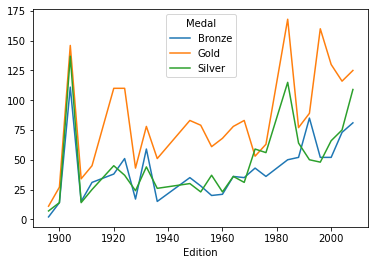

In [74]:
# Create the DataFrame: usa
usa = medals.loc[medals.NOC == 'USA']

# Group usa by ['Edition', 'Medal'] and aggregate over 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()

# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level = 'Medal')

# Plot the DataFrame usa_medals_by_year
usa_medals_by_year.plot()
plt.show()

### Visualizing USA Medal Counts by Edition: Area Plot with Ordered Medals

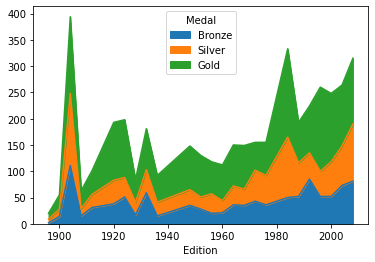

In [75]:
# Redefine 'Medal' as an ordered categorical
medals.Medal = pd.Categorical(values = medals.Medal, categories = ['Bronze', 'Silver', 'Gold'], ordered = True)

# Create the DataFrame: usa
usa = medals[medals.NOC == 'USA']

# Group usa by 'Edition', 'Medal', and 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()

# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')

# Create an area plot of usa_medals_by_year
usa_medals_by_year.plot.area()
plt.show()